1-2. 확률적 경사 하강법 (SGD)

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grad[key]

1-3. SGD의 단점

: 비등방성 함수(방향에 따라 성질, 즉 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임

1-4. 모멘텀 (Momentum)

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

인스턴스 변수 v는 물체의 속도로, 초기화 시에는 아무것도 담지 않고, update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장

1-5. AdaGrad

In [4]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h == None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

1-6. Adam

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 -self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key] - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

1-7. 어느 갱신 방법을 이용할 것인가?

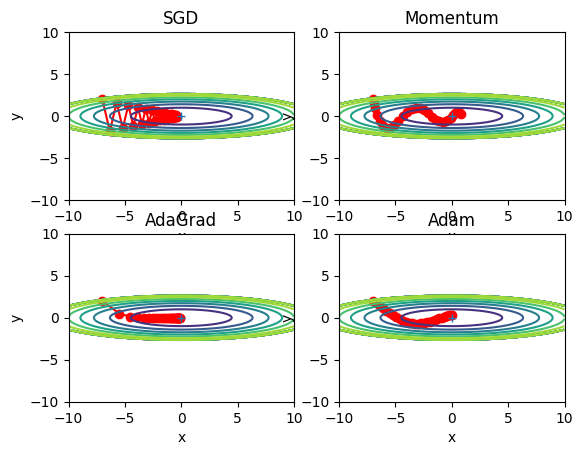

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

def f(x,y):
    return x**2 / 20.0 + y**2

def df(x,y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0,0

optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10,10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X,Y = np.meshgrid(x, y)
    Z = f(X,Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2,2,idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.contour(X,Y,Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0,0,'+')
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')
    
plt.show()

1-8. MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.3682392004445876
Momentum:2.3123219149193766
AdaGrad:2.20865297167764
Adam:2.215931390993032
===========iteration:100===========
SGD:1.6540039425074444
Momentum:0.3585334331342048
AdaGrad:0.11473433872320124
Adam:0.2706037843408673
===========iteration:200===========
SGD:0.8293786560625124
Momentum:0.3460756356539151
AdaGrad:0.13187252629095186
Adam:0.269254401296134
===========iteration:300===========
SGD:0.5142436014648439
Momentum:0.15436815335007636
AdaGrad:0.07894827483903805
Adam:0.14909536516042582
===========iteration:400===========
SGD:0.4735123211005814
Momentum:0.19083109941959847
AdaGrad:0.08318715105969546
Adam:0.1637832048783442
===========iteration:500===========
SGD:0.3634071278526513
Momentum:0.15367106788516627
AdaGrad:0.05459734268387357
Adam:0.1173674742345775
===========iteration:600===========
SGD:0.33543184509719415
Momentum:0.12114341505406528
AdaGrad:0.038064454742890164
Adam:0.04240370834644422
===========iteration:700==

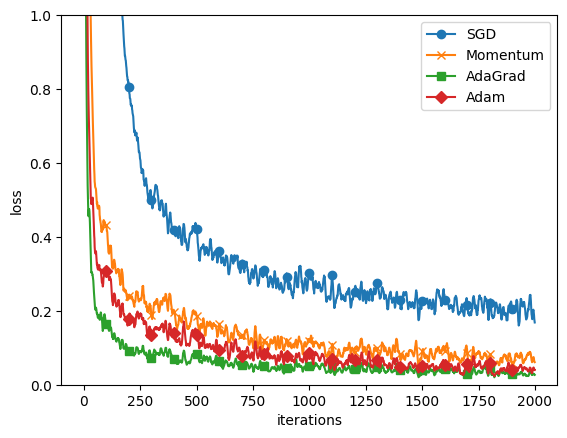

In [9]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

SGD의 학습 진도가 가장 느리고, AdaGrad의 학습 진도가 약간 빠름

2-2. 은닉층의 활성화값 분포

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

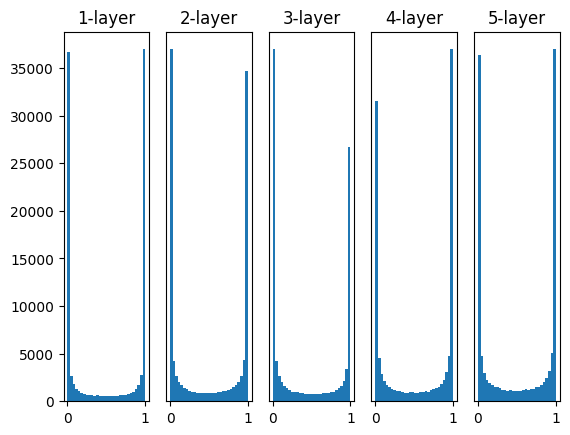

In [15]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화 값들은 0과 1에 치우쳐 분포되어 있음

시그모이드 함수는 출력이 0 또는 1에 가까워지자 그 미분은 0에 가까워짐 -> 역전파의 기울기 값이 점점 작아지다 사라짐 (기울기 소실)

2-4. MNIST 데이터셋으로 본 가중치 초깃값 비교

============iteration : 0============
std=0.01:2.302546249600325
Xavier:2.3046261235693937
He:2.364046942488839
============iteration : 100============
std=0.01:2.301284926328901
Xavier:2.2644649940822967
He:1.6292330445932468
============iteration : 200============
std=0.01:2.3020492919166458
Xavier:2.2002146399653744
He:0.8469707918895626
============iteration : 300============
std=0.01:2.3008971880044142
Xavier:1.9821686389919524
He:0.5109705856164488
============iteration : 400============
std=0.01:2.299989052085596
Xavier:1.645017102779263
He:0.35672520180753453
============iteration : 500============
std=0.01:2.302256762822009
Xavier:1.1489123190474104
He:0.36537451130782117
============iteration : 600============
std=0.01:2.3037275564249446
Xavier:0.7652646870396651
He:0.24919999907534343
============iteration : 700============
std=0.01:2.3008771319381816
Xavier:0.6532577103979298
He:0.36575669945782907
============iteration : 800============
std=0.01:2.299980084989768
Xavier:0.

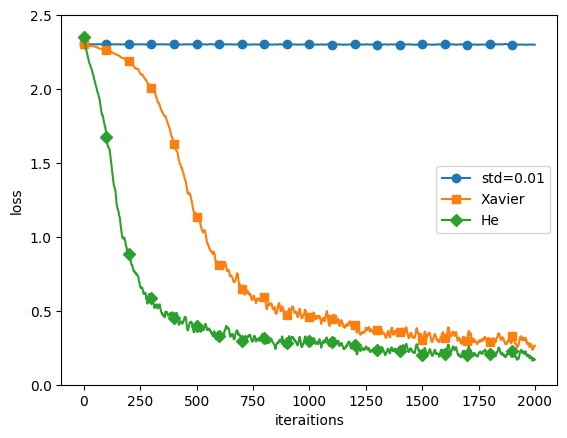

In [18]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0.MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정
weight_init_types = {'std=0.01':0.01, 'Xavier':'sigmoid', 'He':'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size = 784, hidden_size_list = [100,100,100,100],
                                  output_size=10, weight_init_std=weight_type)
    
    train_loss[key] = []
    

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print('============' + 'iteration : ' + str(i)+ '============')
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ':' + str(loss))
            

# 3. 그래프 그리기
markers = {'std=0.01':'o', 'Xavier':'s', 'He':'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key], markevery=100, label=key)

plt.xlabel('iteraitions')
plt.ylabel('loss')
plt.ylim(0, 2.5)
plt.legend()
plt.show()

std = 0.01인 경우 학습이 거의 이루어 지지 않지만 Xavier이거나 He인 경우에는 학습이 잘 이루어 지는 것을 확인함

3-2. 배치 정규화의 효과

============1/16============
epoch:0|0.09871666666666666-0.10268333333333333


/Users/suhye/Desktop/vscode/밑바닥부터시작하는딥러닝/6. 학습관련기술들/../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/suhye/Desktop/vscode/밑바닥부터시작하는딥러닝/6. 학습관련기술들/../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1|0.09871666666666666-0.5325166666666666
epoch:2|0.09871666666666666-0.6316666666666667
epoch:3|0.09871666666666666-0.6835
epoch:4|0.09871666666666666-0.72005
epoch:5|0.09871666666666666-0.7445166666666667
epoch:6|0.09871666666666666-0.7612833333333333
epoch:7|0.09871666666666666-0.7764166666666666
epoch:8|0.09871666666666666-0.7885166666666666
epoch:9|0.09871666666666666-0.79935
epoch:10|0.09871666666666666-0.8088
epoch:11|0.09871666666666666-0.8155333333333333
epoch:12|0.09871666666666666-0.8223666666666667
epoch:13|0.09871666666666666-0.8281833333333334
epoch:14|0.09871666666666666-0.83335
epoch:15|0.09871666666666666-0.8388166666666667
epoch:16|0.09871666666666666-0.8424833333333334
epoch:17|0.09871666666666666-0.8455
epoch:18|0.09871666666666666-0.8497
epoch:19|0.09871666666666666-0.8532833333333333
epoch:20|0.09871666666666666-0.8559166666666667
epoch:21|0.09871666666666666-0.8592166666666666
epoch:22|0.09871666666666666-0.8616333333333334
epoch:23|0.09871666666666666-0.863

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.09871666666666666-0.91505
============2/16============
epoch:0|0.09871666666666666-0.09098333333333333
epoch:1|0.09871666666666666-0.5838333333333333
epoch:2|0.09871666666666666-0.7021666666666667
epoch:3|0.09871666666666666-0.7551833333333333
epoch:4|0.09871666666666666-0.7861833333333333
epoch:5|0.09871666666666666-0.8093333333333333
epoch:6|0.09871666666666666-0.8266666666666667
epoch:7|0.09871666666666666-0.8378
epoch:8|0.09871666666666666-0.8463
epoch:9|0.09871666666666666-0.8569166666666667
epoch:10|0.09871666666666666-0.86195
epoch:11|0.09871666666666666-0.8694833333333334
epoch:12|0.09871666666666666-0.8750833333333333
epoch:13|0.09871666666666666-0.8801333333333333
epoch:14|0.09871666666666666-0.8837333333333334
epoch:15|0.09871666666666666-0.88725
epoch:16|0.09871666666666666-0.8908833333333334
epoch:17|0.09871666666666666-0.8945166666666666
epoch:18|0.09871666666666666-0.8972833333333333
epoch:19|0.09871666666666666-0.9000333333333334
epoch:20|0.09871666666666666-

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.09871666666666666-0.9505666666666667
============3/16============
epoch:0|0.12973333333333334-0.10411666666666666
epoch:1|0.76105-0.70505
epoch:2|0.8326333333333333-0.8
epoch:3|0.8567166666666667-0.8395
epoch:4|0.8773-0.8611833333333333
epoch:5|0.8898166666666667-0.8776833333333334
epoch:6|0.9006166666666666-0.8891
epoch:7|0.90445-0.8987333333333334
epoch:8|0.9108166666666667-0.9050833333333334
epoch:9|0.91775-0.9112833333333333
epoch:10|0.9247333333333333-0.9157333333333333
epoch:11|0.9284666666666667-0.9197166666666666
epoch:12|0.9232166666666667-0.92275
epoch:13|0.9334166666666667-0.9265833333333333
epoch:14|0.9379-0.9293
epoch:15|0.9391-0.9327666666666666
epoch:16|0.9412166666666667-0.93465
epoch:17|0.9401833333333334-0.93635
epoch:18|0.9447833333333333-0.9384833333333333
epoch:19|0.9454666666666667-0.9406666666666667
epoch:20|0.94685-0.9413833333333333
epoch:21|0.9502-0.9433666666666667
epoch:22|0.9501666666666667-0.9451666666666667
epoch:23|0.95335-0.9464666666666667
e

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.9840166666666667-0.97635
============4/16============
epoch:0|0.09371666666666667-0.10158333333333333
epoch:1|0.8576666666666667-0.8219833333333333
epoch:2|0.8979833333333334-0.87525
epoch:3|0.9149-0.8974
epoch:4|0.9279166666666666-0.91125
epoch:5|0.9329666666666667-0.9210333333333334
epoch:6|0.9421666666666667-0.9289833333333334
epoch:7|0.9462833333333334-0.93545
epoch:8|0.9507166666666667-0.9402
epoch:9|0.9557666666666667-0.9435
epoch:10|0.95795-0.9468666666666666
epoch:11|0.9586333333333333-0.9494833333333333
epoch:12|0.9592333333333334-0.9519833333333333
epoch:13|0.96175-0.9546833333333333
epoch:14|0.96555-0.9572333333333334
epoch:15|0.9654666666666667-0.9594333333333334
epoch:16|0.9694-0.96115
epoch:17|0.9676333333333333-0.9622666666666667
epoch:18|0.9699333333333333-0.96455
epoch:19|0.97325-0.96535
epoch:20|0.9726666666666667-0.9666666666666667
epoch:21|0.9739666666666666-0.9685166666666667
epoch:22|0.97445-0.96965
epoch:23|0.9755-0.9702833333333334
epoch:24|0.97725-0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.9971166666666667-0.9941333333333333
============5/16============
epoch:0|0.13293333333333332-0.1105
epoch:1|0.4963666666666667-0.8814166666666666
epoch:2|0.8221166666666667-0.91995
epoch:3|0.8786666666666667-0.9366166666666667
epoch:4|0.89695-0.9476666666666667
epoch:5|0.9131666666666667-0.9545166666666667
epoch:6|0.9182-0.9597666666666667
epoch:7|0.9260833333333334-0.9637333333333333
epoch:8|0.9325333333333333-0.96715
epoch:9|0.9367666666666666-0.9704
epoch:10|0.9421166666666667-0.9729833333333333
epoch:11|0.9458166666666666-0.9754666666666667
epoch:12|0.9491333333333334-0.9771333333333333
epoch:13|0.952-0.97965
epoch:14|0.9547166666666667-0.9808166666666667
epoch:15|0.9581-0.9818333333333333
epoch:16|0.9592-0.9835666666666667
epoch:17|0.9615333333333334-0.9843666666666666
epoch:18|0.9625-0.9854333333333334
epoch:19|0.9648166666666667-0.9861166666666666
epoch:20|0.9651166666666666-0.9879333333333333
epoch:21|0.96795-0.9888
epoch:22|0.96985-0.9889666666666667
epoch:23|0.9706

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.9954333333333333-0.9997666666666667
============6/16============
epoch:0|0.0976-0.08535
epoch:1|0.11236666666666667-0.9206
epoch:2|0.11236666666666667-0.9500333333333333
epoch:3|0.11236666666666667-0.96305
epoch:4|0.11236666666666667-0.9708666666666667
epoch:5|0.11336666666666667-0.9761
epoch:6|0.28641666666666665-0.9795833333333334
epoch:7|0.3568-0.9824
epoch:8|0.56055-0.9850833333333333
epoch:9|0.70135-0.9870333333333333
epoch:10|0.7898-0.9887166666666667
epoch:11|0.8572166666666666-0.9895833333333334
epoch:12|0.875-0.9912666666666666
epoch:13|0.8940333333333333-0.9922333333333333
epoch:14|0.9043833333333333-0.99335
epoch:15|0.9189333333333334-0.9945666666666667
epoch:16|0.9252-0.9947333333333334
epoch:17|0.9291166666666667-0.9955166666666667
epoch:18|0.93655-0.9963833333333333
epoch:19|0.9415333333333333-0.99685
epoch:20|0.9433333333333334-0.99705
epoch:21|0.9484166666666667-0.9976166666666667
epoch:22|0.9513333333333334-0.9978666666666667
epoch:23|0.9515166666666667-0.99

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.9972166666666666-0.99995
============7/16============
epoch:0|0.08988333333333333-0.09046666666666667
epoch:1|0.11236666666666667-0.9514333333333334
epoch:2|0.11236666666666667-0.9714166666666667
epoch:3|0.11236666666666667-0.9788333333333333
epoch:4|0.11236666666666667-0.98435
epoch:5|0.11236666666666667-0.98765
epoch:6|0.11236666666666667-0.9904333333333334
epoch:7|0.11236666666666667-0.99205
epoch:8|0.11236666666666667-0.99315
epoch:9|0.11236666666666667-0.9946666666666667
epoch:10|0.11236666666666667-0.9952666666666666
epoch:11|0.11236666666666667-0.9961
epoch:12|0.11236666666666667-0.9965666666666667
epoch:13|0.11236666666666667-0.9971166666666667
epoch:14|0.11236666666666667-0.9971333333333333
epoch:15|0.11236666666666667-0.9979666666666667
epoch:16|0.11236666666666667-0.9985166666666667
epoch:17|0.11236666666666667-0.9987666666666667
epoch:18|0.11236666666666667-0.9988833333333333
epoch:19|0.11236666666666667-0.9988333333333334
epoch:20|0.11236666666666667-0.99915
epo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.9380166666666667-1.0
============8/16============
epoch:0|0.10566666666666667-0.1114
epoch:1|0.11236666666666667-0.9626333333333333
epoch:2|0.11236666666666667-0.9783
epoch:3|0.11236666666666667-0.9845166666666667
epoch:4|0.11236666666666667-0.9883
epoch:5|0.11236666666666667-0.9909
epoch:6|0.11236666666666667-0.9926
epoch:7|0.11236666666666667-0.9935833333333334
epoch:8|0.11236666666666667-0.99515
epoch:9|0.11236666666666667-0.9950666666666667
epoch:10|0.11236666666666667-0.99705
epoch:11|0.11236666666666667-0.9962833333333333
epoch:12|0.11236666666666667-0.9977166666666667
epoch:13|0.11236666666666667-0.99815
epoch:14|0.11236666666666667-0.9982666666666666
epoch:15|0.11236666666666667-0.99885
epoch:16|0.11236666666666667-0.9987833333333334
epoch:17|0.11236666666666667-0.99895
epoch:18|0.11236666666666667-0.99895
epoch:19|0.11236666666666667-0.9993166666666666
epoch:20|0.11236666666666667-0.9991833333333333
epoch:21|0.11236666666666667-0.9996166666666667
epoch:22|0.11236666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.11236666666666667-0.9999833333333333
============9/16============
epoch:0|0.09915-0.1134
epoch:1|0.11236666666666667-0.9689166666666666
epoch:2|0.11236666666666667-0.9814333333333334
epoch:3|0.11236666666666667-0.9866833333333334
epoch:4|0.11236666666666667-0.9873
epoch:5|0.11236666666666667-0.9900166666666667
epoch:6|0.11236666666666667-0.9936833333333334
epoch:7|0.11236666666666667-0.9947166666666667
epoch:8|0.11236666666666667-0.9944666666666667
epoch:9|0.11236666666666667-0.9960666666666667
epoch:10|0.11236666666666667-0.9962166666666666
epoch:11|0.11236666666666667-0.9969166666666667
epoch:12|0.11236666666666667-0.9970666666666667
epoch:13|0.11236666666666667-0.9979666666666667
epoch:14|0.11236666666666667-0.9982833333333333
epoch:15|0.11236666666666667-0.9983333333333333
epoch:16|0.11236666666666667-0.9986
epoch:17|0.11236666666666667-0.99865
epoch:18|0.11236666666666667-0.99885
epoch:19|0.11236666666666667-0.99915
epoch:20|0.11236666666666667-0.9988833333333333
epoch:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.11236666666666667-1.0
============10/16============
epoch:0|0.09915-0.15851666666666667
epoch:1|0.11236666666666667-0.9639333333333333
epoch:2|0.11236666666666667-0.98035
epoch:3|0.11236666666666667-0.9862333333333333
epoch:4|0.11236666666666667-0.9891333333333333
epoch:5|0.11236666666666667-0.9882166666666666
epoch:6|0.11236666666666667-0.9929
epoch:7|0.11236666666666667-0.9938
epoch:8|0.11236666666666667-0.9949333333333333
epoch:9|0.11236666666666667-0.9947333333333334
epoch:10|0.11236666666666667-0.9968333333333333
epoch:11|0.11236666666666667-0.9968333333333333
epoch:12|0.11236666666666667-0.9972833333333333
epoch:13|0.11236666666666667-0.99795
epoch:14|0.11236666666666667-0.9977333333333334
epoch:15|0.11236666666666667-0.9980833333333333
epoch:16|0.11236666666666667-0.9984
epoch:17|0.11236666666666667-0.99895
epoch:18|0.11236666666666667-0.99855
epoch:19|0.11236666666666667-0.9993333333333333
epoch:20|0.11236666666666667-0.9995
epoch:21|0.11236666666666667-0.99943333333

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:69|0.11236666666666667-1.0
============11/16============
epoch:0|0.0993-0.17485
epoch:1|0.11236666666666667-0.96835
epoch:2|0.11236666666666667-0.9801333333333333
epoch:3|0.11236666666666667-0.9862
epoch:4|0.11236666666666667-0.9895
epoch:5|0.11236666666666667-0.9915833333333334
epoch:6|0.11236666666666667-0.9929333333333333
epoch:7|0.11236666666666667-0.9941666666666666
epoch:8|0.11236666666666667-0.99495
epoch:9|0.11236666666666667-0.9961833333333333
epoch:10|0.11236666666666667-0.995
epoch:11|0.11236666666666667-0.99725
epoch:12|0.11236666666666667-0.9973166666666666
epoch:13|0.11236666666666667-0.9978666666666667
epoch:14|0.11236666666666667-0.998
epoch:15|0.11236666666666667-0.99875
epoch:16|0.11236666666666667-0.9990333333333333
epoch:17|0.11236666666666667-0.9982333333333333
epoch:18|0.11236666666666667-0.9980333333333333
epoch:19|0.11236666666666667-0.99895
epoch:20|0.11236666666666667-0.9984666666666666
epoch:21|0.11236666666666667-0.9983
epoch:22|0.11236666666666667-0.9

KeyboardInterrupt: 

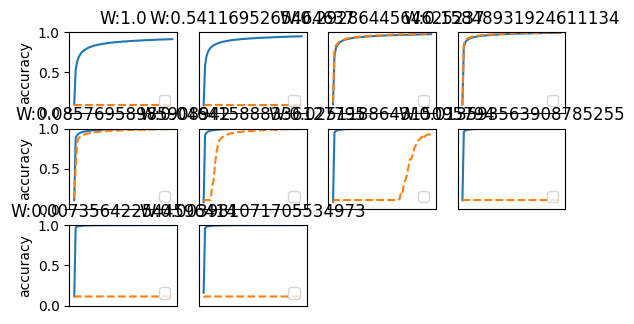

In [22]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

max_epochs = 70
train_size = x_train.shape[0]
batch_size = 100
learning_late = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100], output_size=10,
                               weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100], output_size=10,
                            weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_late)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size/batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            
            print('epoch:' + str(epoch_cnt) + '|' + str(train_acc) + '-' + str(bn_train_acc))
            
            epoch_cnt += 1
        
            if epoch_cnt >= max_epochs:
                break
            
    return train_acc_list, bn_train_acc_list


# 그래프
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print('============' + str(i+1) + '/16'+ '============')
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title('W:' + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle='--', label='Normal(without BatchNorm)')
        
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list,linestyle='--', markevery=2)
    
    plt.ylim(0, 1.0)
    if i%4:
        plt.yticks([])
    
    else:
        plt.ylabel('accuracy') 
    
    if i < 12:
        plt.xticks([])
    
    else:
        plt.xlabel('epochs')
    
    plt.legend(loc='lower right')
plt.show()

실선 : 배치 정규화 사용, 점선 : 배치정규화 사용하지 않은 경우

거의 대부분의 경우에서 배치 정규화를 사용하면 학습 진도가 빨라지는 것을 확인하였다. 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 거의 의존하지 않는다. 

4-1. 오버피팅

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅 재현을 위해 학습 데이터 수 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 가중치 감소 설정
weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)    # 학습률이 0.01인 SGD로 매개 변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch : ', str(epoch_cnt) + ', train acc : ' + str(train_acc) + ', test acc : '+str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
        

# 그래프
markers = {'train':'o', 'test':'s'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()